<h1> Produisez une étude de marché avec R ou Python </h1>

In [1]:
library(tidyr)
library(dplyr)

Warning message:
"package 'tidyr' was built under R version 4.1.3"
Warning message:
"package 'dplyr' was built under R version 4.1.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




<h1> 1 - Importation des Données </h1>

<h2> Disponibilité Alimentaire et Population </h2>

In [2]:
dispo_alimentaire = read.csv("~/OpenClassrooms/Projet 9/data/DisponibiliteAlimentaire_2017.csv", 
    encoding = "UTF-8")
population_2000_2018 = read.csv("~/OpenClassrooms/Projet 9/data/population_2000_2018.csv", 
    encoding = "UTF-8")

<h3> Disponibilité Alimentaire </h3>

In [3]:
summary(dispo_alimentaire)

 X.U.FEFF.Code.Domaine   Domaine            Code.zone         Zone          
 Length:176600         Length:176600      Min.   :  1.0   Length:176600     
 Class :character      Class :character   1st Qu.: 63.0   Class :character  
 Mode  :character      Mode  :character   Median :120.0   Mode  :character  
                                          Mean   :125.5                     
                                          3rd Qu.:188.0                     
                                          Max.   :276.0                     
  Code.Élément    Élément           Code.Produit    Produit         
 Min.   : 645   Length:176600      Min.   :2511   Length:176600     
 1st Qu.: 684   Class :character   1st Qu.:2556   Class :character  
 Median :5142   Mode  :character   Median :2612   Mode  :character  
 Mean   :3810                      Mean   :2629                     
 3rd Qu.:5301                      3rd Qu.:2732                     
 Max.   :5911                      Max.   :2899

In [4]:
#On définit une liste de produits que nous voulons etudier pour ensuite filtré nos variables "produits agricoles" par rapports à notre liste
liste_produits = c( 
                    "Viande, volaille", "Viande de Volailles", "Viande poids vif, poulet")
liste_produits_complet = c("Avoine", "Blé et produits", "Blé", "Mais","Maïs et produits","Maïs", "Oeufs", "Œufs de poule en coquille", 
                    "Viande, volaille", "Viande de Volailles", "Viande poids vif, poulet")
#filtrage données
dispo_alimentaire = filter(dispo_alimentaire, Produit %in% liste_produits)
dispo_alimentaire = filter(dispo_alimentaire, Élément %in% c("Production", "Importations - Quantité","Variation de stock", 
                                                            "Exportations - Quantité", "Disponibilité intérieure"))
                                                            
dispo_alimentaire["Dispo_Produit"] = paste(dispo_alimentaire$Élément, dispo_alimentaire$Produit)
dispo_alimentaire["Dispo_Produit"] = paste(dispo_alimentaire$Dispo_Produit, dispo_alimentaire$Unité)
dispo_alimentaire_concat = dispo_alimentaire[, c("Zone", "Dispo_Produit", "Valeur")]
dispo_alimentaire_concat = dispo_alimentaire_concat %>% pivot_wider(names_from = Dispo_Produit, values_from = Valeur)
head(dispo_alimentaire_concat)

Zone,Production Viande de Volailles Milliers de tonnes,Importations - Quantité Viande de Volailles Milliers de tonnes,Variation de stock Viande de Volailles Milliers de tonnes,Disponibilité intérieure Viande de Volailles Milliers de tonnes,Exportations - Quantité Viande de Volailles Milliers de tonnes
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,28,29,0,57,NA
Afrique du Sud,1667,514,0,2118,63
Albanie,13,38,4,47,0
Algérie,275,2,0,277,0
Allemagne,1514,842,-29,1739,646
Angola,42,277,0,319,0


In [5]:
print(paste("On a", list(unique(dispo_alimentaire$Produit)) ,"comme Produit unique"))
print(paste("On a", list(unique(dispo_alimentaire$Unité)), "comme unité"))
print(paste("On a",length(unique(dispo_alimentaire$Zone)), "Pays"))
print(paste("On a", sum(is.na(dispo_alimentaire_concat)), "valeurs manquante"))

[1] "On a Viande de Volailles comme Produit unique"
[1] "On a Milliers de tonnes comme unité"
[1] "On a 170 Pays"
[1] "On a 38 valeurs manquante"


<h3> Population </h3>

In [6]:
summary(population_2000_2018)

 X.U.FEFF.Code.Domaine   Domaine            Code.zone         Zone          
 Length:4411           Length:4411        Min.   :  1.0   Length:4411       
 Class :character      Class :character   1st Qu.: 68.0   Class :character  
 Mode  :character      Mode  :character   Median :132.0   Mode  :character  
                                          Mean   :132.2                     
                                          3rd Qu.:195.0                     
                                          Max.   :299.0                     
  Code.Élément   Élément           Code.Produit    Produit         
 Min.   :511   Length:4411        Min.   :3010   Length:4411       
 1st Qu.:511   Class :character   1st Qu.:3010   Class :character  
 Median :511   Mode  :character   Median :3010   Mode  :character  
 Mean   :511                      Mean   :3010                     
 3rd Qu.:511                      3rd Qu.:3010                     
 Max.   :511                      Max.   :3010       

In [7]:
# On filtre et renomme notre données poulation à l'année 2017
pop_2017 = dplyr::filter(population_2000_2018, Année == 2017)
pop_2017 = pop_2017[, c(4, 12)]
colnames(pop_2017)[2] = "Population"
head(pop_2017)

,Zone,Population
,<chr>,<dbl>
1,Afghanistan,36296.113
2,Afrique du Sud,57009.756
3,Albanie,2884.169
4,Algérie,41389.189
5,Allemagne,82658.409
6,Andorre,77.001


In [8]:
print(paste("On a",length(unique(pop_2017$Zone)), "Pays"))
print(paste("On a", sum(is.na(pop_2017)), "valeurs manquante"))

[1] "On a 236 Pays"
[1] "On a 0 valeurs manquante"


<h3> Merge dataframe Population et Disponibilité Alimentaire </h3>

In [9]:
donnees_alimentaire = merge(pop_2017, dispo_alimentaire_concat, by = "Zone")

Warning message:
"package 'corrplot' was built under R version 4.1.3"
corrplot 0.92 loaded



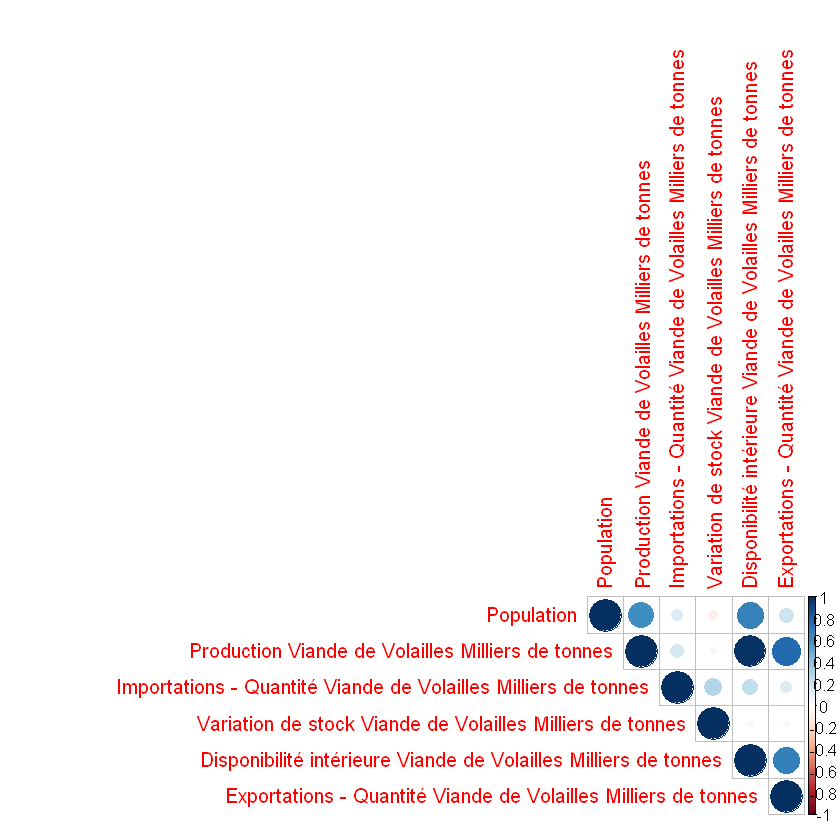

In [10]:
library("corrplot")
corrplot(na.omit(donnees_alimentaire %>% select(!c("Zone"))) %>% cor, type='upper')

In [11]:
cor((na.omit(donnees_alimentaire %>% select(!c("Zone")))))

,Population,Production Viande de Volailles Milliers de tonnes,Importations - Quantité Viande de Volailles Milliers de tonnes,Variation de stock Viande de Volailles Milliers de tonnes,Disponibilité intérieure Viande de Volailles Milliers de tonnes,Exportations - Quantité Viande de Volailles Milliers de tonnes
Population,1.00000000,0.61788500,0.1410408,-0.09045308,0.67612062,0.20176215
Production Viande de Volailles Milliers de tonnes,0.61788500,1.00000000,0.1746721,0.05656381,0.98789585,0.77477356
Importations - Quantité Viande de Volailles Milliers de tonnes,0.14104078,0.17467207,1.0000000,0.29682719,0.24270482,0.14196667
Variation de stock Viande de Volailles Milliers de tonnes,-0.09045308,0.05656381,0.2968272,1.00000000,0.04480511,0.04709063
Disponibilité intérieure Viande de Volailles Milliers de tonnes,0.67612062,0.98789585,0.2427048,0.04480511,1.00000000,0.68130701
Exportations - Quantité Viande de Volailles Milliers de tonnes,0.20176215,0.77477356,0.1419667,0.04709063,0.68130701,1.00000000


Notre variable "Disponibilité Intérieure" est fortement corrélées avec notre variable "Production", on pourrait donc en choisir l'une des 2, dans ce cas la "Production"

In [12]:
donnees_alimentaire[6] = list(NULL)
# On change les valeurs NA à des valeurs nulles car elles concernent la colonne Exportatitions où l'on suppose un très faible niveau d'exportations quant au
# volailes
donnees_alimentaire[is.na(donnees_alimentaire)] = 0
head(donnees_alimentaire)

write.csv(donnees_alimentaire, file = "~/OpenClassrooms/Projet 9/data/merged/donnees_alimentaire.csv",
    fileEncoding = "UTF-8", row.names = FALSE)

,Zone,Population,Production Viande de Volailles Milliers de tonnes,Importations - Quantité Viande de Volailles Milliers de tonnes,Variation de stock Viande de Volailles Milliers de tonnes,Exportations - Quantité Viande de Volailles Milliers de tonnes
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,36296.113,28,29,0,0
2,Afrique du Sud,57009.756,1667,514,0,63
3,Albanie,2884.169,13,38,4,0
4,Algérie,41389.189,275,2,0,0
5,Allemagne,82658.409,1514,842,-29,646
6,Angola,29816.766,42,277,0,0


In [13]:
colSums(is.na(donnees_alimentaire))
print(paste(sum(is.na(donnees_alimentaire)), "valeurs manquantes"))

Zone 
                                                             0 
                                                    Population 
                                                             0 
             Production Viande de Volailles Milliers de tonnes 
                                                             0 
Importations - Quantité Viande de Volailles Milliers de tonnes 
                                                             0 
     Variation de stock Viande de Volailles Milliers de tonnes 
                                                             0 
Exportations - Quantité Viande de Volailles Milliers de tonnes 
                                                             0

[1] "0 valeurs manquantes"


In [14]:
#On crée un fichier contenant les pays dont les disponibilité alimentaire ne sont pas fournies.
pays_manquants = anti_join(pop_2017, dispo_alimentaire_concat)
print(paste(length(pays_manquants$Zone), "Pays manquants des données"))

Joining, by = "Zone"


[1] "66 Pays manquants des données"


<h1> Ajout de données supplémentaire FAO </h1>

Choix des données fait selon les critères PESTEL (Politique, Economie, Social, Technologie, Environement et Légal)

<h2> Prix Consommation </h2>

In [15]:
# Import des données sur les prix de consommation
prix_conso = read.csv("~/OpenClassrooms/Projet 9/data/Prix/FAO_PrixConsommation_2017.csv", 
    encoding = "UTF-8")

In [16]:
summary(prix_conso)

 Code.Domaine         Domaine          Code.zone..FAO.     Zone          
 Length:4920        Length:4920        Min.   :  1     Length:4920       
 Class :character   Class :character   1st Qu.: 63     Class :character  
 Mode  :character   Mode  :character   Median :126     Mode  :character  
                                       Mean   :129                       
                                       3rd Qu.:192                       
                                       Max.   :299                       
   Code.année       Année       Code.Produit     Produit         
 Min.   :2017   Min.   :2017   Min.   :23012   Length:4920       
 1st Qu.:2017   1st Qu.:2017   1st Qu.:23012   Class :character  
 Median :2017   Median :2017   Median :23013   Mode  :character  
 Mean   :2017   Mean   :2017   Mean   :23013                     
 3rd Qu.:2017   3rd Qu.:2017   3rd Qu.:23014                     
 Max.   :2017   Max.   :2017   Max.   :23014                     
   Code.Mois        

In [17]:
prix_conso['Prix_Consommation'] = paste(prix_conso$Produit, prix_conso$Unité)
prix_conso_concat = prix_conso[,c('Zone','Prix_Consommation','Mois','Valeur')]
prix_conso_concat = prix_conso_concat %>% group_by(Zone,Prix_Consommation) %>% summarise(avg=mean(Valeur))
prix_conso_concat = prix_conso_concat %>% pivot_wider(names_from = Prix_Consommation, values_from = avg)
head(prix_conso_concat)

`summarise()` has grouped output by 'Zone'. You can override using the `.groups` argument.


Zone,Food price inflation %,"Prix à la Consommation, Indices généraux (2015 = 100)"
<chr>,<dbl>,<dbl>
Afghanistan,6.957529,109.5907
Afrique du Sud,6.902629,112.0963
Albanie,3.924577,103.2957
Algérie,5.040496,112.3586
Allemagne,2.762497,102.0087
Andorre,2.877625,102.1478


In [18]:
colSums(is.na(prix_conso_concat))

Zone 
                                                     0 
                                Food price inflation % 
                                                     0 
Prix à la Consommation, Indices généraux (2015 = 100)  
                                                     0

In [19]:
print(paste("On a", list(unique(prix_conso$Produit)) ,"comme Produit unique"))
print(paste("On a", list(unique(prix_conso$Unité)), "comme unité"))
print(paste("On a",length(unique(prix_conso_concat$Zone)), "Pays"))
print(paste("On a", sum(is.na(prix_conso_concat)), "valeurs manquante"))

[1] "On a c(\"Food price inflation\", \"Prix à la Consommation, Indices généraux (2015 = 100)\") comme Produit unique"
[1] "On a c(\"%\", \"\") comme unité"
[1] "On a 205 Pays"
[1] "On a 0 valeurs manquante"


<h2> Indicateurs Macro et Stabilité Politique </h2>

In [20]:
#Importation de données d'indicateurs macro
ind_macro = read.csv("~/OpenClassrooms/Projet 9/data/Indicateur/FAO_IndicateurMacro_2017.csv", encoding="UTF-8")
stab_gdp = read.csv("~/OpenClassrooms/Projet 9/data/Indicateur/FAO_Indicateur_GDP_StabilitePolitique_2017.csv", encoding="UTF-8")

<h3> Indicateur Macro </h3>

In [21]:
summary(ind_macro)

 X.U.FEFF.Code.Domaine   Domaine          Code.zone..FAO.     Zone          
 Length:1114           Length:1114        Min.   :  1.0   Length:1114       
 Class :character      Class :character   1st Qu.: 67.0   Class :character  
 Mode  :character      Mode  :character   Median :130.0   Mode  :character  
                                          Mean   :132.2                     
                                          3rd Qu.:195.0                     
                                          Max.   :351.0                     
  Code.Élément    Élément           Code.Produit     Produit         
 Min.   :6110   Length:1114        Min.   :22008   Length:1114       
 1st Qu.:6110   Class :character   1st Qu.:22008   Class :character  
 Median :6120   Mode  :character   Median :22010   Mode  :character  
 Mean   :6120                      Mean   :22017                     
 3rd Qu.:6129                      3rd Qu.:22011                     
 Max.   :6129                      Max.  

In [22]:
ind_macro['Ind_Produit'] = paste(ind_macro$Élément, ind_macro$Produit)
ind_macro['Ind_Produit'] = paste(ind_macro$Ind_Produit, ind_macro$Unité)
ind_macro_concat = ind_macro[,c('Zone', 'Ind_Produit', 'Valeur')]
ind_macro_concat = ind_macro_concat %>% pivot_wider(names_from = Ind_Produit, values_from = Valeur)
head(ind_macro_concat)

Zone,Valeur US $ Produit Intérieur Brut millions,Croissance annuelle US$ Produit Intérieur Brut %,Valeur US $ Revenu national brut millions,Croissance annuelle US$ Revenu national brut %,Valeur US $ Valeur ajoutée (Agriculture) millions,Croissance annuelle US$ Valeur ajoutée (Agriculture) %,Valeur US $ Production brute (Agriculture) millions,Croissance annuelle US$ Production brute (Agriculture) %
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,18896.35,4.865790,19145.02,5.197452,NA,NA,NA,NA
Afrique du Sud,349006.69,17.771989,338539.75,17.486899,NA,NA,NA,NA
Albanie,13019.73,9.765944,13051.52,8.275484,NA,NA,NA,NA
Algérie,170096.98,6.287889,167910.13,5.693699,NA,NA,NA,NA
Allemagne,3690849.15,6.441277,3778789.18,6.339421,26136.3,30.77339,60237.99,13.14383
Andorre,3000.16,3.645145,3000.16,3.645145,NA,NA,NA,NA


In [23]:
print(paste("On a", list(unique(ind_macro$Produit)) ,"comme Produit unique"))
print(paste("On a", list(unique(ind_macro$Unité)), "comme unité"))
print(paste("On a", length(unique(ind_macro_concat$Zone)), "Pays"))
print(paste("On a", sum(is.na(ind_macro_concat)), "valeurs manquante"))

[1] "On a c(\"Produit Intérieur Brut\", \"Revenu national brut\", \"Valeur ajoutée (Agriculture)\", \"Production brute (Agriculture)\") comme Produit unique"
[1] "On a c(\"millions\", \"%\") comme unité"
[1] "On a 211 Pays"
[1] "On a 574 valeurs manquante"


In [24]:
colSums(is.na(ind_macro_concat))

Zone 
                                                       0 
             Valeur US $ Produit Intérieur Brut millions 
                                                       0 
        Croissance annuelle US$ Produit Intérieur Brut % 
                                                       0 
               Valeur US $ Revenu national brut millions 
                                                       0 
          Croissance annuelle US$ Revenu national brut % 
                                                       0 
       Valeur US $ Valeur ajoutée (Agriculture) millions 
                                                     142 
  Croissance annuelle US$ Valeur ajoutée (Agriculture) % 
                                                     142 
     Valeur US $ Production brute (Agriculture) millions 
                                                     145 
Croissance annuelle US$ Production brute (Agriculture) % 
                                                     145

In [25]:
# Pour garder le plus de pays possible on va supprimer la variable concernant l'agriculture.
ind_macro_concat[6:9] = list(NULL)

<h3> Stabilité Politique </h3>

In [26]:
summary(stab_gdp)

 Code.Domaine         Domaine          Code.zone..FAO.     Zone          
 Length:612         Length:612         Min.   :  1.0   Length:612        
 Class :character   Class :character   1st Qu.: 84.0   Class :character  
 Mode  :character   Mode  :character   Median :167.0   Mode  :character  
                                       Mean   :227.9                     
                                       3rd Qu.:256.0                     
                                       Max.   :894.0                     
                                                                         
  Code.Élément    Élément           Code.Produit     Produit         
 Min.   :6121   Length:612         Min.   :21032   Length:612        
 1st Qu.:6121   Class :character   1st Qu.:21032   Class :character  
 Median :6125   Mode  :character   Median :21033   Mode  :character  
 Mean   :6124                      Mean   :21359                     
 3rd Qu.:6126                      3rd Qu.:22013          

In [27]:
stab_gdp_concat = stab_gdp[,c('Zone','Produit','Valeur')]
stab_gdp_concat = stab_gdp_concat %>% pivot_wider(names_from = Produit, values_from = Valeur)
head(stab_gdp_concat)

Zone,"PIB par habitant, ($ PPA internationaux constants de 2017)",Stabilité politique et absence de violence/terrorisme (indice),Valeur des importations alimentaires par rapport aux exportations totales de marchandises (%) (moyenne sur 3 ans)
<chr>,<dbl>,<dbl>,<dbl>
Afghanistan,2058.4,-2.80,363
Afrique du Sud,13860.3,-0.28,6
Albanie,12771.0,0.38,21
Algérie,11737.4,-0.92,23
Allemagne,53071.5,0.59,5
Andorre,NA,1.42,3


In [28]:
print(paste("On a", list(unique(stab_gdp$Produit)) ,"comme Produit unique"))
print(paste("On a", list(unique(stab_gdp$Unité)), "comme unité"))
print(paste("On a",length(unique(stab_gdp_concat$Zone)), "Pays"))
print(paste("On a", sum(is.na(stab_gdp_concat)), "valeurs manquante"))

[1] "On a c(\"PIB par habitant, ($ PPA internationaux constants de 2017)\", \"Stabilité politique et absence de violence/terrorisme (indice)\", \"Valeur des importations alimentaires par rapport aux exportations totales de marchandises (%) (moyenne sur 3 ans)\") comme Produit unique"
[1] "On a c(\"I$\", \"indice\", \"%\") comme unité"
[1] "On a 204 Pays"
[1] "On a 17 valeurs manquante"


<h3> Merge dataframe Indicateurs </h3>

In [29]:
donnees_indicateur = merge(ind_macro_concat, stab_gdp_concat,by = "Zone")
head(donnees_indicateur)

,Zone,Valeur US $ Produit Intérieur Brut millions,Croissance annuelle US$ Produit Intérieur Brut %,Valeur US $ Revenu national brut millions,Croissance annuelle US$ Revenu national brut %,"PIB par habitant, ($ PPA internationaux constants de 2017)",Stabilité politique et absence de violence/terrorisme (indice),Valeur des importations alimentaires par rapport aux exportations totales de marchandises (%) (moyenne sur 3 ans)
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,18896.35,4.865790,19145.02,5.197452,2058.4,-2.80,363
2,Afrique du Sud,349006.69,17.771989,338539.75,17.486899,13860.3,-0.28,6
3,Albanie,13019.73,9.765944,13051.52,8.275484,12771.0,0.38,21
4,Algérie,170096.98,6.287889,167910.13,5.693699,11737.4,-0.92,23
5,Allemagne,3690849.15,6.441277,3778789.18,6.339421,53071.5,0.59,5
6,Andorre,3000.16,3.645145,3000.16,3.645145,NA,1.42,3


In [30]:
print(paste(sum(is.na(donnees_indicateur)), "valeurs manquantes"))

[1] "13 valeurs manquantes"


In [31]:
colSums(is.na(donnees_indicateur))

Zone 
                                                                                                                0 
                                                                      Valeur US $ Produit Intérieur Brut millions 
                                                                                                                0 
                                                                 Croissance annuelle US$ Produit Intérieur Brut % 
                                                                                                                0 
                                                                        Valeur US $ Revenu national brut millions 
                                                                                                                0 
                                                                   Croissance annuelle US$ Revenu national brut % 
                                                                                                                0 
                                                       PIB par habitant, ($ PPA internationaux constants de 2017) 
                                                                                                               13 
                                                   Stabilité politique et absence de violence/terrorisme (indice) 
                                                                                                                0 
Valeur des importations alimentaires par rapport aux exportations totales de marchandises (%) (moyenne sur 3 ans) 
                                                                                                                0

In [32]:
head(donnees_indicateur)

,Zone,Valeur US $ Produit Intérieur Brut millions,Croissance annuelle US$ Produit Intérieur Brut %,Valeur US $ Revenu national brut millions,Croissance annuelle US$ Revenu national brut %,"PIB par habitant, ($ PPA internationaux constants de 2017)",Stabilité politique et absence de violence/terrorisme (indice),Valeur des importations alimentaires par rapport aux exportations totales de marchandises (%) (moyenne sur 3 ans)
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,18896.35,4.865790,19145.02,5.197452,2058.4,-2.80,363
2,Afrique du Sud,349006.69,17.771989,338539.75,17.486899,13860.3,-0.28,6
3,Albanie,13019.73,9.765944,13051.52,8.275484,12771.0,0.38,21
4,Algérie,170096.98,6.287889,167910.13,5.693699,11737.4,-0.92,23
5,Allemagne,3690849.15,6.441277,3778789.18,6.339421,53071.5,0.59,5
6,Andorre,3000.16,3.645145,3000.16,3.645145,NA,1.42,3


In [33]:
cor(na.omit(donnees_indicateur %>% select(!c("Zone"))))
donnees_indicateur[4:6] = list(NULL)

,Valeur US $ Produit Intérieur Brut millions,Croissance annuelle US$ Produit Intérieur Brut %,Valeur US $ Revenu national brut millions,Croissance annuelle US$ Revenu national brut %,"PIB par habitant, ($ PPA internationaux constants de 2017)",Stabilité politique et absence de violence/terrorisme (indice),Valeur des importations alimentaires par rapport aux exportations totales de marchandises (%) (moyenne sur 3 ans)
Valeur US $ Produit Intérieur Brut millions,1.00000000,-0.03778296,0.99992120,-0.01951393,0.19036551,0.04588829,-0.11427491
Croissance annuelle US$ Produit Intérieur Brut %,-0.03778296,1.00000000,-0.03900771,0.94530126,-0.01452437,-0.07304529,-0.10124414
Valeur US $ Revenu national brut millions,0.99992120,-0.03900771,1.00000000,-0.02062979,0.18950346,0.04595275,-0.11274122
Croissance annuelle US$ Revenu national brut %,-0.01951393,0.94530126,-0.02062979,1.00000000,-0.01565952,-0.07265306,-0.04349207
"PIB par habitant, ($ PPA internationaux constants de 2017)",0.19036551,-0.01452437,0.18950346,-0.01565952,1.00000000,0.52501521,-0.25242250
Stabilité politique et absence de violence/terrorisme (indice),0.04588829,-0.07304529,0.04595275,-0.07265306,0.52501521,1.00000000,-0.03929908
Valeur des importations alimentaires par rapport aux exportations totales de marchandises (%) (moyenne sur 3 ans),-0.11427491,-0.10124414,-0.11274122,-0.04349207,-0.25242250,-0.03929908,1.00000000


donnees_indicateur[4:6] = list(NULL)
donnees_indicateur[is.na(donnees_indicateur)] = 0

In [34]:
write.csv(donnees_indicateur, file = "~/OpenClassrooms/Projet 9/data/merged/donnees_indicateur.csv", 
    fileEncoding = "UTF-8", row.names = FALSE)

<h2> Emploi Agriculture </h2>

In [35]:
emploi_agri = read.csv("~/OpenClassrooms/Projet 9/data/Emploi/FAO_IndicateurEmploi_Agriculture.csv", encoding = "UTF-8")

In [36]:
summary(emploi_agri)

 X.U.FEFF.Code.Domaine   Domaine          Code.zone..M49.     Zone          
 Length:189            Length:189         Min.   :  4.0   Length:189        
 Class :character      Class :character   1st Qu.:214.0   Class :character  
 Mode  :character      Mode  :character   Median :426.0   Mode  :character  
                                          Mean   :434.5                     
                                          3rd Qu.:662.0                     
                                          Max.   :894.0                     
 Code.indicateur  Indicateur           Sex.Code      Sex           
 Min.   :21144   Length:189         Min.   :13   Length:189        
 1st Qu.:21144   Class :character   1st Qu.:13   Class :character  
 Median :21144   Mode  :character   Median :13   Mode  :character  
 Mean   :21144                      Mean   :13                     
 3rd Qu.:21144                      3rd Qu.:13                     
 Max.   :21144                      Max.   :13       

In [37]:
#Pour réduire le nombre de colonnes on va garder pour cet étude le "Total"(sex)
emploi_agri["Ind_Emploi_Agri"] = paste(emploi_agri$Indicateur, emploi_agri$Sex)
emploi_agri["Ind_Emploi_Agri"] = paste(emploi_agri$Ind_Emploi_Agri, emploi_agri$Unité)
emploi_agri_concat = emploi_agri[, c("Zone", "Ind_Emploi_Agri", "Valeur")]
emploi_agri_concat = emploi_agri_concat %>% pivot_wider(names_from = Ind_Emploi_Agri, values_from = Valeur)
donnees_emploi = emploi_agri_concat

In [38]:
write.csv(donnees_emploi, file = "~/OpenClassrooms/Projet 9/data/merged/donnees_emploi.csv", 
    fileEncoding = "UTF-8", row.names = FALSE)

<h2> Investissement </h2>

In [39]:
profil_invest = read.csv("~/OpenClassrooms/Projet 9/data/Investissement/FAO_Profil_Investissements_2017.csv", 
    encoding = "UTF-8")
flux_dev = read.csv("~/OpenClassrooms/Projet 9/data/Investissement/FAO_FluxDeveloppement_2017.csv", 
    encoding = "UTF-8")

<h3> Profil Investissement </h3>

In [40]:
profil_invest = filter(profil_invest, Produit %in% c("IED - entrées totales"))

profil_invest["Profil_Produit"] = paste(profil_invest$Élément, profil_invest$Produit)
profil_invest["Profil_Produit"] = paste(profil_invest$Profil_Produit, profil_invest$Unité)
profil_invest_concat = profil_invest[, c("Zone", "Profil_Produit", "Valeur")]
profil_invest_concat = profil_invest_concat %>% pivot_wider(names_from = Profil_Produit, values_from = Valeur)
head(profil_invest_concat)

Zone,Valeur US $ IED - entrées totales millions
<chr>,<dbl>
Afghanistan,53.390
Afrique du Sud,2008.361
Albanie,1148.891
Algérie,1232.342
Allemagne,48641.418
Angola,-7397.295


In [41]:
print(paste("On a", list(unique(profil_invest$Produit)) ,"comme Produit unique"))
print(paste("On a", list(unique(profil_invest$Unité)), "comme unité"))
print(paste("On a",length(unique(profil_invest_concat$Zone)), "Pays"))
print(paste("On a", sum(is.na(profil_invest_concat)), "valeurs manquante"))

[1] "On a IED - entrées totales comme Produit unique"
[1] "On a millions comme unité"
[1] "On a 200 Pays"
[1] "On a 0 valeurs manquante"


In [42]:
colSums(is.na(profil_invest_concat))

Zone 
                                         0 
Valeur US $ IED - entrées totales millions 
                                         0

In [43]:
profil_invest_concat[is.na(profil_invest_concat)] = 0

<h3> Flux Developpement </h3>

Ici on a des versement de la France vers des pays bénéficiare.

In [44]:
flux_dev["Flux_Dev_Produit"] = paste(flux_dev$Produit, flux_dev$Objectif)
flux_dev["Flux_Dev_Produit"] = paste(flux_dev$Flux_Dev_Produit, flux_dev$Élément)
head(flux_dev)

,Code.Domaine,Domaine,Code.Donateur..M49.,Donateur,Code.Pays.bénéficiaire..M49.,Pays.bénéficiaire,Code.Élément,Élément,Code.Produit,Produit,Code.objectif,Objectif,Code.année,Année,Unité,Valeur,Symbole,Description.du.Symbole,Note,Flux_Dev_Produit
,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<lgl>,<chr>
1,EA,Flux de développement de l’Agriculture,250,France,4,Afghanistan,6110,Valeur US $,22050,Versement,311,Agriculture,2017,2017,millions,0.000000,E,Valeur estimée,NA,Versement Agriculture Valeur US $
2,EA,Flux de développement de l’Agriculture,250,France,710,Afrique du Sud,6110,Valeur US $,22050,Versement,311,Agriculture,2017,2017,millions,1.266818,E,Valeur estimée,NA,Versement Agriculture Valeur US $
3,EA,Flux de développement de l’Agriculture,250,France,8,Albanie,6110,Valeur US $,22050,Versement,311,Agriculture,2017,2017,millions,NA,,,NA,Versement Agriculture Valeur US $
4,EA,Flux de développement de l’Agriculture,250,France,12,Algérie,6110,Valeur US $,22050,Versement,311,Agriculture,2017,2017,millions,0.003585,E,Valeur estimée,NA,Versement Agriculture Valeur US $
5,EA,Flux de développement de l’Agriculture,250,France,24,Angola,6110,Valeur US $,22050,Versement,311,Agriculture,2017,2017,millions,NA,,,NA,Versement Agriculture Valeur US $
6,EA,Flux de développement de l’Agriculture,250,France,660,Anguilla,6110,Valeur US $,22050,Versement,311,Agriculture,2017,2017,millions,NA,,,NA,Versement Agriculture Valeur US $


In [45]:
flux_dev["Flux_Dev_Produit"] = paste(flux_dev$Produit, flux_dev$Objectif)
flux_dev["Flux_Dev_Produit"] = paste(flux_dev$Flux_Dev_Produit, flux_dev$Élément)
flux_dev["Flux_Dev_Produit"] = paste(flux_dev$Flux_Dev_Produit, flux_dev$Unité)
flux_dev_concat = flux_dev[, c("Pays.bénéficiaire","Flux_Dev_Produit", "Valeur")]
colnames(flux_dev_concat)[1] = "Zone"
flux_dev_concat = flux_dev_concat %>% pivot_wider(names_from = Flux_Dev_Produit, values_from = Valeur)
head(flux_dev_concat)

Zone,Versement Agriculture Valeur US $ millions
<chr>,<dbl>
Afghanistan,0.000000
Afrique du Sud,1.266818
Albanie,NA
Algérie,0.003585
Angola,NA
Anguilla,NA


In [46]:
print(paste("On a", list(unique(flux_dev$Produit)) ,"comme Produit unique"))
print(paste("On a", list(unique(flux_dev$Unité)), "comme unité"))
print(paste("On a",length(unique(flux_dev_concat$Zone)), "Pays"))
print(paste("On a", sum(is.na(flux_dev_concat)), "valeurs manquante"))

[1] "On a Versement comme Produit unique"
[1] "On a millions comme unité"
[1] "On a 179 Pays"
[1] "On a 104 valeurs manquante"


In [47]:
colSums(is.na(flux_dev_concat))
flux_dev_concat[is.na(flux_dev_concat)] = 0

Zone 
                                         0 
Versement Agriculture Valeur US $ millions 
                                       104

<h3> Merge des dataframe Investissement </h3>

In [48]:
donnees_investissement = merge(profil_invest_concat, flux_dev_concat, by = "Zone", 
    ) 

write.csv(donnees_investissement, file = "~/OpenClassrooms/Projet 9/data/merged/donnees_investissement.csv", 
    fileEncoding = "UTF-8", row.names = FALSE)
head(donnees_investissement)

,Zone,Valeur US $ IED - entrées totales millions,Versement Agriculture Valeur US $ millions
,<chr>,<dbl>,<dbl>
1,Afghanistan,53.39000,0.000000
2,Afrique du Sud,2008.36098,1.266818
3,Albanie,1148.89122,0.000000
4,Algérie,1232.34192,0.003585
5,Angola,-7397.29541,0.000000
6,Anguilla,53.53482,0.000000


In [49]:
colSums(is.na(donnees_investissement))
cor(na.omit(donnees_investissement %>% select(!c("Zone"))))

Zone 
                                         0 
Valeur US $ IED - entrées totales millions 
                                         0 
Versement Agriculture Valeur US $ millions 
                                         0

,Valeur US $ IED - entrées totales millions,Versement Agriculture Valeur US $ millions
Valeur US $ IED - entrées totales millions,1.00000000,-0.02008574
Versement Agriculture Valeur US $ millions,-0.02008574,1.00000000


In [50]:
colSums(is.na(donnees_investissement))

Zone 
                                         0 
Valeur US $ IED - entrées totales millions 
                                         0 
Versement Agriculture Valeur US $ millions 
                                         0

<h1> Environnement </h1>

In [51]:
emissions = read.csv("~/OpenClassrooms/Projet 9/data/Environnement/FAOSTAT_Intensités des émissions.csv", 
    encoding = "UTF-8")

In [52]:
emissions["emissions"] = paste(emissions$Élément, emissions$Produit)
emissions["emissions"] = paste(emissions$emissions, emissions$Unité)
emissions_concat = emissions[, c("Zone", "emissions", "Valeur")]
emissions_concat = emissions_concat %>% pivot_wider(names_from = emissions, values_from = Valeur)
head(emissions_concat)

Zone,"Émissions (CO2eq) Viande, volaille gigagrammes"
<chr>,<dbl>
Afghanistan,11.4021
Afrique du Sud,617.8128
Albanie,11.5674
Algérie,490.2887
Allemagne,458.2107
Andorre,0.0000


In [53]:
print(paste("On a", list(unique(emissions$Produit)) ,"comme Produit unique"))
print(paste("On a", list(unique(emissions$Unité)), "comme unité"))
print(paste("On a",length(unique(emissions_concat$Zone)), "Pays"))
print(paste("On a", sum(is.na(emissions_concat)), "valeurs manquante"))

[1] "On a Viande, volaille comme Produit unique"
[1] "On a gigagrammes comme unité"
[1] "On a 251 Pays"
[1] "On a 0 valeurs manquante"


In [54]:
tend_elevage = read.csv("~/OpenClassrooms/Projet 9/data/FAO_TendanceElevage_2017.csv", 
    encoding = "UTF-8")

In [55]:
tend_elevage = filter(tend_elevage, Élément %in% c("Réserves"))
tend_elevage["Tend_Elevage"] = paste(tend_elevage$Élément, tend_elevage$Produit)
tend_elevage["Tend_Elevage"] = paste(tend_elevage$Tend_Elevage, tend_elevage$Unité)
tend_elevage_concat = tend_elevage[, c("Zone", "Tend_Elevage", "Valeur")]
tend_elevage_concat = tend_elevage_concat %>% pivot_wider(names_from = Tend_Elevage, values_from = Valeur)
head(tend_elevage_concat)

Zone,Réserves Poulets Unités de gros bétail (UGB)
<chr>,<dbl>
Afghanistan,135730
Afrique du Sud,1746810
Albanie,78350
Algérie,1362070
Allemagne,1600000
Angola,365000


In [56]:
print(paste("On a", list(unique(tend_elevage$Produit)) ,"comme Produit unique"))
print(paste("On a", list(unique(tend_elevage$Unité)), "comme unité"))
print(paste("On a",length(unique(tend_elevage_concat$Zone)), "Pays"))
print(paste("On a", sum(is.na(tend_elevage_concat)), "valeurs manquante"))

[1] "On a Poulets comme Produit unique"
[1] "On a Unités de gros bétail (UGB) comme unité"
[1] "On a 196 Pays"
[1] "On a 0 valeurs manquante"


In [57]:
donnees_environ = merge(emissions_concat, tend_elevage_concat, on='Zone')

<h1> Merge Final - donnees_etudes </h1>

In [58]:
donnees_etudes = merge(donnees_environ, emploi_agri_concat, on='Zone')
donnees_etudes = merge(donnees_etudes, donnees_alimentaire, on='Zone')
donnees_etudes = merge(donnees_etudes, prix_conso_concat, on='Zone')
donnees_etudes = merge(donnees_etudes, profil_invest_concat, on='Zone')
donnees_etudes = merge(donnees_etudes, donnees_indicateur, on='Zone')


write.csv(donnees_etudes, file = "~/OpenClassrooms/Projet 9/data/merged/donnees_etudes.csv", 
    fileEncoding = "UTF-8", row.names = FALSE)

In [59]:
head(donnees_etudes)

,Zone,"Émissions (CO2eq) Viande, volaille gigagrammes",Réserves Poulets Unités de gros bétail (UGB),"Employment in agriculture, forestry and fishing - ILO modelled estimates Total 1000 personnes",Population,Production Viande de Volailles Milliers de tonnes,Importations - Quantité Viande de Volailles Milliers de tonnes,Variation de stock Viande de Volailles Milliers de tonnes,Exportations - Quantité Viande de Volailles Milliers de tonnes,Food price inflation %,"Prix à la Consommation, Indices généraux (2015 = 100)",Valeur US $ IED - entrées totales millions,Valeur US $ Produit Intérieur Brut millions,Croissance annuelle US$ Produit Intérieur Brut %,Stabilité politique et absence de violence/terrorisme (indice),Valeur des importations alimentaires par rapport aux exportations totales de marchandises (%) (moyenne sur 3 ans)
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,11.4021,135730,3886.590,36296.113,28,29,0,0,6.957529,109.5907,53.390,18896.35,4.865790,-2.80,363
2,Afrique du Sud,617.8128,1746810,874.329,57009.756,1667,514,0,63,6.902629,112.0963,2008.361,349006.69,17.771989,-0.28,6
3,Albanie,11.5674,78350,444.023,2884.169,13,38,4,0,3.924577,103.2957,1148.891,13019.73,9.765944,0.38,21
4,Algérie,490.2887,1362070,1114.380,41389.189,275,2,0,0,5.040496,112.3586,1232.342,170096.98,6.287889,-0.92,23
5,Allemagne,458.2107,1600000,532.023,82658.409,1514,842,-29,646,2.762497,102.0087,48641.418,3690849.15,6.441277,0.59,5
6,Angola,160.8742,365000,5812.330,29816.766,42,277,0,0,28.911962,169.8029,-7397.295,122123.86,20.766647,-0.38,7


In [60]:
sum(is.na(donnees_etudes))

[1] 0

In [61]:
colSums(is.na(donnees_etudes))

Zone 
                                                                                                                0 
                                                                   Émissions (CO2eq) Viande, volaille gigagrammes 
                                                                                                                0 
                                                                     Réserves Poulets Unités de gros bétail (UGB) 
                                                                                                                0 
                    Employment in agriculture, forestry and fishing - ILO modelled estimates Total 1000 personnes 
                                                                                                                0 
                                                                                                       Population 
                                                                                                                0 
                                                                Production Viande de Volailles Milliers de tonnes 
                                                                                                                0 
                                                   Importations - Quantité Viande de Volailles Milliers de tonnes 
                                                                                                                0 
                                                        Variation de stock Viande de Volailles Milliers de tonnes 
                                                                                                                0 
                                                   Exportations - Quantité Viande de Volailles Milliers de tonnes 
                                                                                                                0 
                                                                                           Food price inflation % 
                                                                                                                0 
                                                           Prix à la Consommation, Indices généraux (2015 = 100)  
                                                                                                                0 
                                                                       Valeur US $ IED - entrées totales millions 
                                                                                                                0 
                                                                      Valeur US $ Produit Intérieur Brut millions 
                                                                                                                0 
                                                                 Croissance annuelle US$ Produit Intérieur Brut % 
                                                                                                                0 
                                                   Stabilité politique et absence de violence/terrorisme (indice) 
                                                                                                                0 
Valeur des importations alimentaires par rapport aux exportations totales de marchandises (%) (moyenne sur 3 ans) 
                                                                                                                0